# **Evaluación de un Modelo de Machine Learning**

- Es muy importante escoger los métodos de evaluación que se alinien a los objetivos de nuestra aplicación.

- Calcula la métrica de evaluación seleccionada para múltiples y diferentes modelos.

- Selecciona el modelo que posea el mejor valor de la métrica de evaluación.


En definitiva, se debe seleccionar el modelo o la configuración de parámetros que optimicen las métricas de evaluación, las cuales creemos son importantes para nuestro caso/aplicación.

<br>

**¿Por qué no basta con la precisión?**

- Supongamos tenemos 2 clases:
  - Relevante (R): clase positiva
  - No Relevante (N): clase negativa

- De 1000 items seleccionados al azar, en promedio:
  - 1 item es Relevante y posee etiqueta R
  - El resto (999 items) no son relevantes y poseen etiqueta N

- Recordar que:

\begin{equation*}
\frac{predicciones \ correctas}{{total \ de \ instancias}} =
precision
\end{equation*}


# **Evaluando modelos de clasificación** 

### **Matriz de confusión**

- [referencia](https://www.youtube.com/watch?v=r5WIImKV1XA)

![img](https://drive.google.com/uc?id=1SRlsCNOHTeJ2SVTPbLvdMVn5RTa8ZspL)

Matriz de confusión sin normalizar
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Matriz de confusión con datos normalizados
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


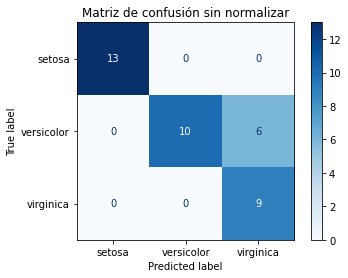

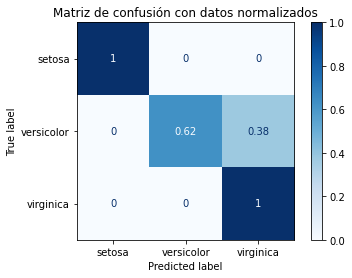

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# carga de datos
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# divide dataset en subconjuntos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Crea modelo clasficador de tipo support vector classifier
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Arma gráfico con datos sin normalizar y otro con datos normalizados
titles_options = [("Matriz de confusión sin normalizar", None),
                  ("Matriz de confusión con datos normalizados", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### **Curva ROC y área bajo la curva**

- [referencia 1](https://www.youtube.com/watch?v=AcbbkCL0dlo)
- [referencia 2](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es-419)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# carga de datos
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Transformamos las clases que para tenga una salida binaria
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Añade características con "ruido" para sumar dificultad a la clasificación
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# divide set de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# crea modelo clasificador
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))

# entrena modelo
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Calcula la curva ROC y su área para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el "micro-promedio" de la curva y su área
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'abajo a la derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


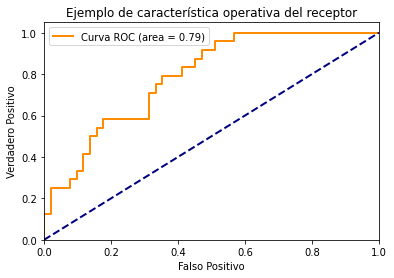

In [ ]:
# Configura gráfico
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='Curva ROC (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Ejemplo de característica operativa del receptor')
plt.legend(loc="abajo a la derecha")
plt.show()

# **Evaluando modelos de regresión** 

- [referencia](https://www.youtube.com/watch?v=F7xj8H_p288)

* Error cuadrático medio (Mean squared error): 2548.07
* Coeficiente de determinacion: 0.47


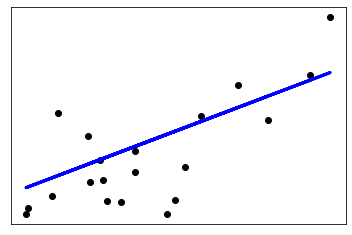

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Carga de datos
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# utiliza sólo 1 característica
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Divide set de datos en subconjuntos de entrenamiento y testing
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Divide variable target en subconjuntos de entrenamiento y testing
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Crea modelo de tipo regresión lineal
regr = linear_model.LinearRegression()

# Entrena modelo con datos de entrenamiento
regr.fit(diabetes_X_train, diabetes_y_train)

# Hace predicciones con datos de testing
diabetes_y_pred = regr.predict(diabetes_X_test)

# Calcula error cuadrático medio
print('* Error cuadrático medio (Mean squared error): %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Calcula el coeficiente de determinación (r2)
print('* Coeficiente de determinacion: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Grafica resultados
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()